In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook


In [2]:
bfs_antifraud = pd.read_csv("./src/antifraud_bfs.log", names=['time', 'description', 'row'], parse_dates=['time'])
bi_antifraud = pd.read_csv("./src/bi_antifraud.log", names=['time', 'description', 'row'], parse_dates=['time'])

In [3]:
bfs_antifraud = bfs_antifraud.drop('description',1)
bi_antifraud = bi_antifraud.drop('description',1)

In [4]:
bfs_antifraud['prev'] = bfs_antifraud['time'].shift(1)
bi_antifraud['prev'] = bi_antifraud['time'].shift(1)

In [5]:
bfs_antifraud['delta'] = (bfs_antifraud['time'] - bfs_antifraud['prev']).astype('int64')
bfs_antifraud['delta'] = bfs_antifraud['delta'].apply(lambda x: int(x / 1000000))
bfs_antifraud = bfs_antifraud.drop(0,0)

In [6]:
bi_antifraud['delta'] = (bi_antifraud['time'] - bi_antifraud['prev']).astype('int64')
bi_antifraud['delta'] = bi_antifraud['delta'].apply(lambda x: int(x / 1000000))
bi_antifraud = bi_antifraud.drop(0,0)

In [7]:
bfs_antifraud['cumsum'] = bfs_antifraud['delta'].cumsum()

In [8]:
bi_antifraud['cumsum'] = bi_antifraud['delta'].cumsum()

In [9]:
bfs_antifraud.head()

,time,row,prev,delta,cumsum
1,2016-11-09 12:53:28.753,20000,2016-11-09 12:53:28.638,115,115
2,2016-11-09 12:53:28.839,30000,2016-11-09 12:53:28.753,86,201
3,2016-11-09 12:53:28.933,40000,2016-11-09 12:53:28.839,94,295
4,2016-11-09 12:53:29.023,50000,2016-11-09 12:53:28.933,90,385
5,2016-11-09 12:53:29.112,60000,2016-11-09 12:53:29.023,89,474


<IPython.core.display.Javascript object>


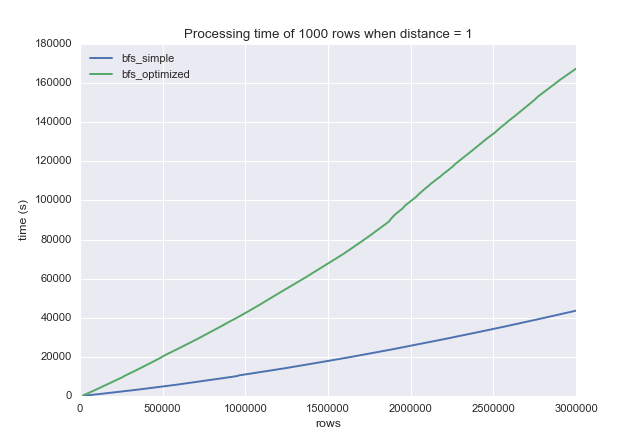

In [10]:
plt.figure()
plt.plot(bfs_antifraud['row'].ix[1:], bfs_antifraud['cumsum'], label='bfs_simple')
plt.plot(bi_antifraud['row'].ix[1:], bi_antifraud['cumsum'], label='bfs_optimized')
plt.title('Processing time of 1000 rows when distance = 1')
plt.ylabel('time (s)')
plt.xlabel('rows')
plt.legend(loc=2)

In [14]:
antifraud2 = pd.read_csv("./src/antifraud2.log", names=['time', 'description', 'row'], parse_dates=['time'])
bi_antifraud2 = pd.read_csv("./src/bi_antifraud2.log", names=['time', 'description', 'row'], parse_dates=['time'])

In [16]:
antifraud2 = antifraud2.drop('description',1)
bi_antifraud2 = bi_antifraud2.drop('description',1)

In [18]:
antifraud2['prev'] = antifraud2['time'].shift(1)
bi_antifraud2['prev'] = bi_antifraud2['time'].shift(1)

In [20]:
antifraud2['delta'] = (antifraud2['time'] - antifraud2['prev']).astype('int64')
antifraud2['delta'] = antifraud2['delta'].apply(lambda x: int(x / 1000000))
antifraud2 = antifraud2.drop(0,0)

In [23]:
bi_antifraud2['delta'] = (bi_antifraud2['time'] - bi_antifraud2['prev']).astype('int64')
bi_antifraud2['delta'] = bi_antifraud2['delta'].apply(lambda x: int(x / 1000000))
bi_antifraud2 = bi_antifraud2.drop(0,0)

In [25]:
antifraud2['cumsum'] = antifraud2['delta'].cumsum()

In [26]:
bi_antifraud2['cumsum'] = bi_antifraud2['delta'].cumsum()

<IPython.core.display.Javascript object>


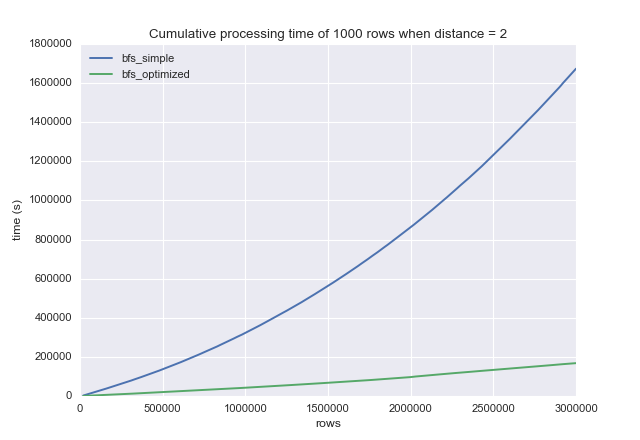

In [28]:
plt.figure()
plt.plot(antifraud2['row'].ix[1:], antifraud2['cumsum'], label='bfs_simple')
plt.plot(bi_antifraud2['row'].ix[1:], bi_antifraud2['cumsum'], label='bfs_optimized')
plt.title('Cumulative processing time of 1000 rows when distance = 2')
plt.ylabel('time (s)')
plt.xlabel('rows')
plt.legend(loc=2)